In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [ ]:
with open('data.txt' , 'r') as f:
  x = f.readline().split(' ')
  a = ''.join(x[1:])
  names = np.array(a.split(':')[1:])
  d = np.array([i.strip().split(' ') for i in f.readlines() ])

z = {}
for i in range(len(names)):
  z.update( { names[i] : d[:,i] } )

result = pd.DataFrame(z)
result.to_csv('Train_data.csv') 

In [ ]:
data_1 = pd.read_csv( 'AQI.csv' )
data_1.head()

,Date,Humidity,Wind Speed,Dew Point,Temperature,Pressure,Festival,Lockdown,Covid-Case,PM2.5
0,01-10-2019,83.0,4.5,76.0,81.9,28.1,0,0,0,84
1,02-10-2019,81.6,4.6,77.4,83.8,28.1,0,0,0,83
2,03-10-2019,82.0,3.7,75.3,81.7,28.1,0,0,0,81
3,04-10-2019,85.4,2.7,73.9,78.6,28.1,0,0,0,94
4,05-10-2019,87.4,3.5,75.3,79.4,28.1,0,0,0,112


In [ ]:
data_1.isnull().sum()
data_1.info()
data_1.info()
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         153 non-null    object 
 1   Humidity     153 non-null    float64
 2   Wind Speed   153 non-null    float64
 3   Dew Point    153 non-null    float64
 4   Temperature  153 non-null    float64
 5   Pressure     153 non-null    float64
 6   Festival     153 non-null    int64  
 7   Lockdown     153 non-null    int64  
 8   Covid-Case   153 non-null    int64  
 9   PM2.5        153 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 12.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         153 non-null    object 
 1   Humidity     153 non-null    float64
 2   Wind Speed   153 non-null    float64
 3   Dew Poin

,Humidity,Wind Speed,Dew Point,Temperature,Pressure,Festival,Lockdown,Covid-Case,PM2.5
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,70.162745,4.867320,70.523529,83.209150,28.103922,0.379085,0.254902,126.790850,115.379085
std,13.595166,2.458466,4.240714,6.856752,0.057219,0.895945,0.437237,284.215209,33.686247
min,32.900000,1.700000,59.000000,72.600000,28.000000,0.000000,0.000000,0.000000,53.000000
25%,62.000000,3.700000,67.300000,77.900000,28.100000,0.000000,0.000000,0.000000,84.000000
50%,72.600000,4.600000,70.200000,81.700000,28.100000,0.000000,0.000000,0.000000,112.000000
75%,79.500000,5.500000,74.000000,86.900000,28.100000,0.000000,1.000000,32.000000,150.000000
max,92.900000,28.500000,81.000000,98.500000,28.200000,4.000000,1.000000,1012.000000,190.000000


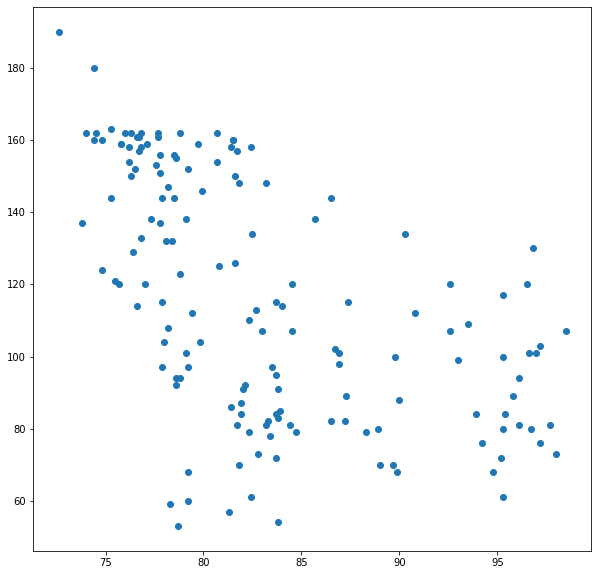

In [ ]:
plt.figure( figsize=(10,10) )
plt.scatter( data_1[ 'Temperature' ] , data_1['PM2.5'] )
plt.show()

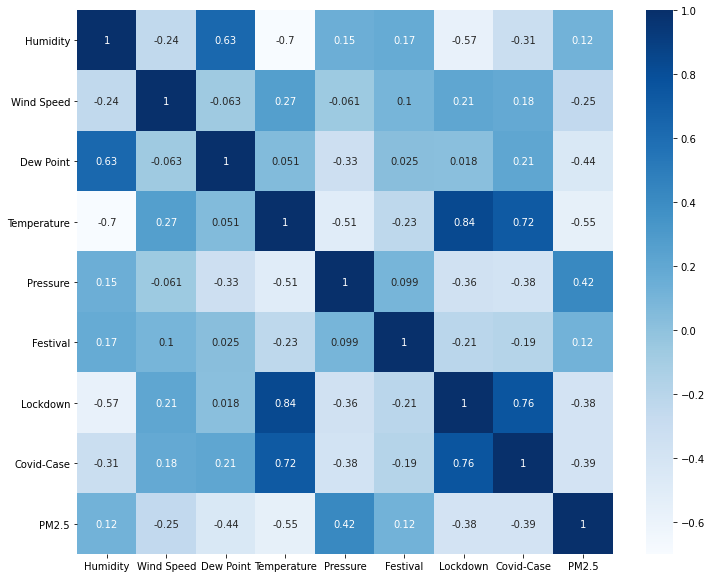

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
cor_target = abs(cor["PM2.5"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

X = data_1[  ['Temperature' , 'Humidity'] ] 
Y = data_1['PM2.5']

print( X.isnull().sum() , Y.isnull().sum() )


Temperature    0
Humidity       0
dtype: int64 0


In [ ]:
X = np.array(X)
Y = np.array(Y)

print( X.shape , Y.shape )

x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(X , Y , test_size = 0.2 )
print( x_train.shape , y_train.shape )
print( x_test.shape , y_test.shape)

model = LinearRegression()

model.fit(x_train , y_train)

acc = model.score(x_test , y_test)
print(acc)

(153, 2) (153,)
(122, 2) (122,)
(31, 2) (31,)
0.4178507171636169


In [ ]:

with open('model_1.pickle' , 'wb') as f:
  pickle.dump( model , f )

In [ ]:
with open('model_1.pickle' , 'rb') as f:
  model = pickle.load(f)
data = pd.read_csv('Train_data.csv')
#data['Weather_Temperature6'].isnull().sum()

pre = np.array(  data[ ['Weather_Temperature6' , 'Humedad_Habitacion_Sensor10'  ] ]  )
print( pre.shape )


(1373, 2)


In [ ]:
predictions = model.predict( pre )
print(predictions)
data['pre'] = predictions
data.head()

[488.33016097 488.4636611  488.30676126 ... 472.87818199 470.77604616
 468.84577099]


,Unnamed: 0,Date2,Time3,Temperature_Comedor_Sensor4,Temperature_Habitacion_Sensor5,Weather_Temperature6,CO2_Comedor_Sensor7,CO2_Habitacion_Sensor8,Humedad_Comedor_Sensor9,Humedad_Habitacion_Sensor10,Lighting_Comedor_Sensor11,Lighting_Habitacion_Sensor12,Precipitacion13,Meteo_Exterior_Crepusculo14,Meteo_Exterior_Viento15,Meteo_Exterior_Sol_Oest16,Meteo_Exterior_Sol_Est17,Meteo_Exterior_Sol_Sud18,Meteo_Exterior_Piranometro19,Exterior_Entalpic_120,Exterior_Entalpic_221,Exterior_Entalpic_turbo22,Temperature_Exterior_Sensor23,Humedad_Exterior_Sensor24,Day_Of_Week\n,pre
0,0,18/04/2012,00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,0.65,0.000000,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0,488.330161
1,1,18/04/2012,00:15,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,0.65,0.000000,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0,488.463661
2,2,18/04/2012,00:30,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,0.65,0.088000,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0,488.306761
3,3,18/04/2012,00:45,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,0.65,0.127333,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0,488.200313
4,4,18/04/2012,01:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,0.65,0.000000,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0,488.027182


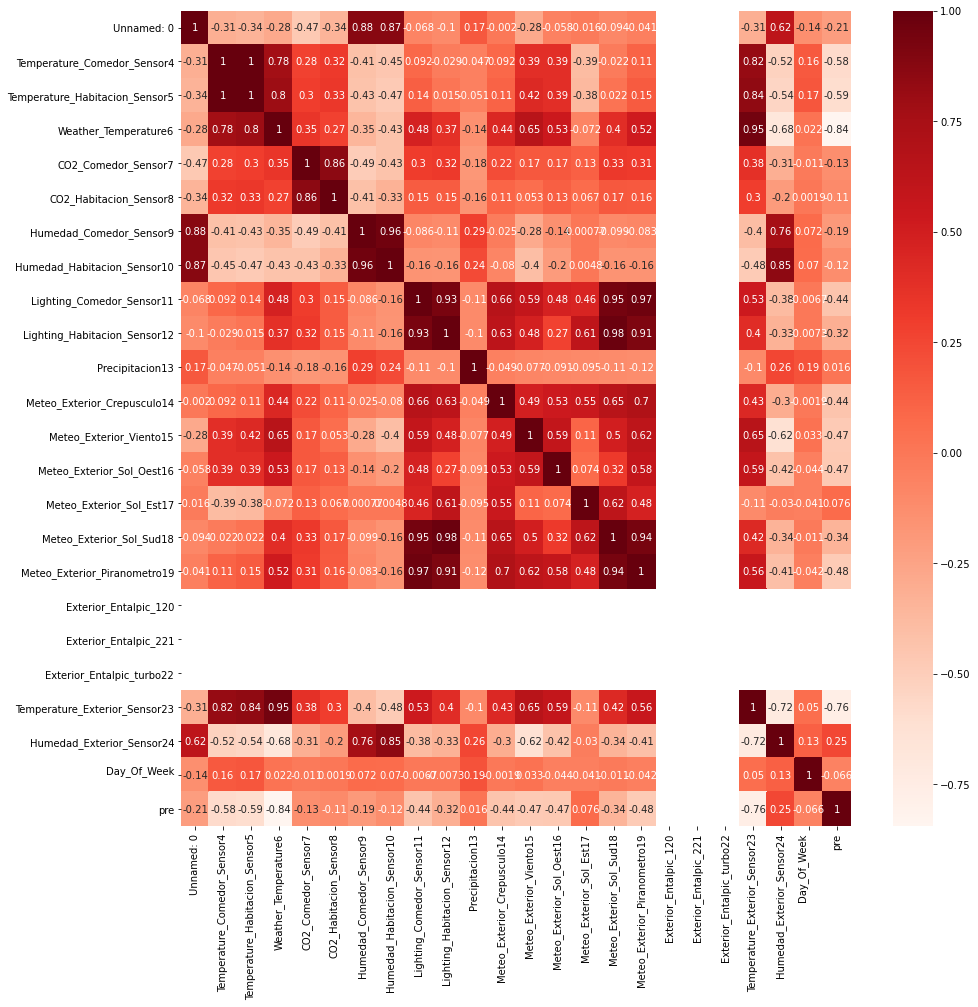

In [ ]:
# ######### Heat map
plt.figure(figsize=(15,15) )
cor = data.corr()
sns.heatmap(cor ,annot=True, cmap=plt.cm.Reds )
plt.show()

In [ ]:
cor_target = abs(cor['Weather_Temperature6'])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Temperature_Comedor_Sensor4       0.775902
Temperature_Habitacion_Sensor5    0.795019
Weather_Temperature6              1.000000
Meteo_Exterior_Viento15           0.649255
Meteo_Exterior_Sol_Oest16         0.532689
Meteo_Exterior_Piranometro19      0.519458
Temperature_Exterior_Sensor23     0.953384
Humedad_Exterior_Sensor24         0.682726
pre                               0.844061
Name: Weather_Temperature6, dtype: float64

In [ ]:

lis_drop = [ 'Date2'	 , 'Time3' , 'Weather_Temperature6' , 'Exterior_Entalpic_120' ,'Exterior_Entalpic_221' , 'Exterior_Entalpic_turbo22' , 'Day_Of_Week\n'
'Lighting_Comedor_Sensor11' , 	'Lighting_Habitacion_Sensor12'  , 	'Precipitacion13'	 , 'Meteo_Exterior_Crepusculo14'  
     ]

features = []
for i in data:
  # print(i)
  if i not in lis_drop:
    features.append( i )

print(len(features))
print (features)

x = np.array(data[features  ])
y = np.array(data['Weather_Temperature6'])

print(x.shape , y.shape)

  #x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.1 )
 #print(x_train.shape , y_train.shape)
 #print(x_test.shape , y_test.shape)

while True:
  x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.2 )
  linear = linear_model.LinearRegression()
  linear.fit(x_train,  y_train)
  acc = linear.score(x_test , y_test)
  if int(acc*100) > 94:
    #print(acc*100)
    break


predictions = linear.predict(x_test)

for i in range(len(predictions)):
  print('PREDICTED WEATHER : '+str(predictions[i])  ,'\t','ACTUAL WEATEHR : '+str(y_test[i]))
  print(acc)

17
['Unnamed: 0', 'Temperature_Comedor_Sensor4', 'Temperature_Habitacion_Sensor5', 'CO2_Comedor_Sensor7', 'CO2_Habitacion_Sensor8', 'Humedad_Comedor_Sensor9', 'Humedad_Habitacion_Sensor10', 'Lighting_Comedor_Sensor11', 'Meteo_Exterior_Viento15', 'Meteo_Exterior_Sol_Oest16', 'Meteo_Exterior_Sol_Est17', 'Meteo_Exterior_Sol_Sud18', 'Meteo_Exterior_Piranometro19', 'Temperature_Exterior_Sensor23', 'Humedad_Exterior_Sensor24', 'Day_Of_Week\n', 'pre']
(1373, 17) (1373,)
PREDICTED WEATHER : 22.999999999999957 	 ACTUAL WEATEHR : 23.0
1.0
PREDICTED WEATHER : 15.000000000000085 	 ACTUAL WEATEHR : 15.0
1.0
PREDICTED WEATHER : 16.600000000000065 	 ACTUAL WEATEHR : 16.6
1.0
PREDICTED WEATHER : 14.000000000000085 	 ACTUAL WEATEHR : 14.0
1.0
PREDICTED WEATHER : 15.000000000000057 	 ACTUAL WEATEHR : 15.0
1.0
PREDICTED WEATHER : 15.000000000000085 	 ACTUAL WEATEHR : 15.0
1.0
PREDICTED WEATHER : 27.93330000000016 	 ACTUAL WEATEHR : 27.9333
1.0
PREDICTED WEATHER : 17.000000000000085 	 ACTUAL WEATEHR : 17.

In [ ]:

lis_drop = [ 'Date2'	 , 'Time3' , 'Weather_Temperature6' , 'Exterior_Entalpic_120' ,'Exterior_Entalpic_221' , 'Exterior_Entalpic_turbo22' , 'Day_Of_Week\n'
'Lighting_Comedor_Sensor11' , 	'Lighting_Habitacion_Sensor12'  , 	'Precipitacion13'	 , 'Meteo_Exterior_Crepusculo14'  
     ]

features = []
for i in data:
  # print(i)
  if i not in lis_drop:
    features.append( i )

print(len(features))
print (features)

x = np.array(data[features  ])
y = np.array(data['Humedad_Comedor_Sensor9'])

print(x.shape , y.shape)

  #x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.1 )
 #print(x_train.shape , y_train.shape)
 #print(x_test.shape , y_test.shape)

while True:
  x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.2 )
  linear = linear_model.LinearRegression()
  linear.fit(x_train,  y_train)
  acc = linear.score(x_test , y_test)
  if int(acc*100) > 94:
    #print(acc*100)
    break


predictions = linear.predict(x_test)

for i in range(len(predictions)):
  print('PREDICTED Humidity : '+str(predictions[i])  ,'\t','ACTUAL humidity : '+str(y_test[i]))
  print(acc)

17
['Unnamed: 0', 'Temperature_Comedor_Sensor4', 'Temperature_Habitacion_Sensor5', 'CO2_Comedor_Sensor7', 'CO2_Habitacion_Sensor8', 'Humedad_Comedor_Sensor9', 'Humedad_Habitacion_Sensor10', 'Lighting_Comedor_Sensor11', 'Meteo_Exterior_Viento15', 'Meteo_Exterior_Sol_Oest16', 'Meteo_Exterior_Sol_Est17', 'Meteo_Exterior_Sol_Sud18', 'Meteo_Exterior_Piranometro19', 'Temperature_Exterior_Sensor23', 'Humedad_Exterior_Sensor24', 'Day_Of_Week\n', 'pre']
(1373, 17) (1373,)
PREDICTED Humidity : 34.604 	 ACTUAL humidity : 34.604
1.0
PREDICTED Humidity : 31.213300000000128 	 ACTUAL humidity : 31.2133
1.0
PREDICTED Humidity : 38.04799999999999 	 ACTUAL humidity : 38.048
1.0
PREDICTED Humidity : 31.158699999999886 	 ACTUAL humidity : 31.1587
1.0
PREDICTED Humidity : 38.19469999999999 	 ACTUAL humidity : 38.1947
1.0
PREDICTED Humidity : 31.49870000000004 	 ACTUAL humidity : 31.4987
1.0
PREDICTED Humidity : 40.00669999999987 	 ACTUAL humidity : 40.0067
1.0
PREDICTED Humidity : 33.25200000000008 	 ACTUA

In [ ]:


lis_drop = [ 'Date2'	 , 'Time3' , 'Weather_Temperature6' , 'Exterior_Entalpic_120' ,'Exterior_Entalpic_221' , 'Exterior_Entalpic_turbo22' , 'Day_Of_Week\n'
'Lighting_Comedor_Sensor11' , 	'Lighting_Habitacion_Sensor12'  , 	'Precipitacion13'	 , 'Meteo_Exterior_Crepusculo14'  
     ]

features = []
for i in data:
  # print(i)
  if i not in lis_drop:
    features.append( i )

print(len(features))
print (features)

x = np.array(data[features  ])
y = np.array(data['CO2_Comedor_Sensor7'])

print(x.shape , y.shape)

  #x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.1 )
 #print(x_train.shape , y_train.shape)
 #print(x_test.shape , y_test.shape)

while True:
  x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x , y , test_size = 0.2 )
  linear = linear_model.LinearRegression()
  linear.fit(x_train,  y_train)
  acc = linear.score(x_test , y_test)
  if int(acc*100) > 94:
    #print(acc*100)
    break


predictions = linear.predict(x_test)

for i in range(len(predictions)):
  print('PREDICTED CO2 : '+str(predictions[i])  ,'\t','ACTUAL CO2 : '+str(y_test[i]))
  print(acc)

17
['Unnamed: 0', 'Temperature_Comedor_Sensor4', 'Temperature_Habitacion_Sensor5', 'CO2_Comedor_Sensor7', 'CO2_Habitacion_Sensor8', 'Humedad_Comedor_Sensor9', 'Humedad_Habitacion_Sensor10', 'Lighting_Comedor_Sensor11', 'Meteo_Exterior_Viento15', 'Meteo_Exterior_Sol_Oest16', 'Meteo_Exterior_Sol_Est17', 'Meteo_Exterior_Sol_Sud18', 'Meteo_Exterior_Piranometro19', 'Temperature_Exterior_Sensor23', 'Humedad_Exterior_Sensor24', 'Day_Of_Week\n', 'pre']
(1373, 17) (1373,)
PREDICTED CO2 : 199.7330000000008 	 ACTUAL CO2 : 199.733
1.0
PREDICTED CO2 : 209.47199999999827 	 ACTUAL CO2 : 209.472
1.0
PREDICTED CO2 : 204.35199999999801 	 ACTUAL CO2 : 204.352
1.0
PREDICTED CO2 : 198.2400000000009 	 ACTUAL CO2 : 198.24
1.0
PREDICTED CO2 : 205.39700000000056 	 ACTUAL CO2 : 205.39700000000002
1.0
PREDICTED CO2 : 195.19999999999897 	 ACTUAL CO2 : 195.2
1.0
PREDICTED CO2 : 205.48299999999992 	 ACTUAL CO2 : 205.483
1.0
PREDICTED CO2 : 203.42399999999964 	 ACTUAL CO2 : 203.424
1.0
PREDICTED CO2 : 209.9519999999